<a href="https://colab.research.google.com/github/seidikun/nivelamento-icm/blob/main/Exerc%C3%ADcio_2_An%C3%A1lise_de_Padr%C3%B5es_em_Dado_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

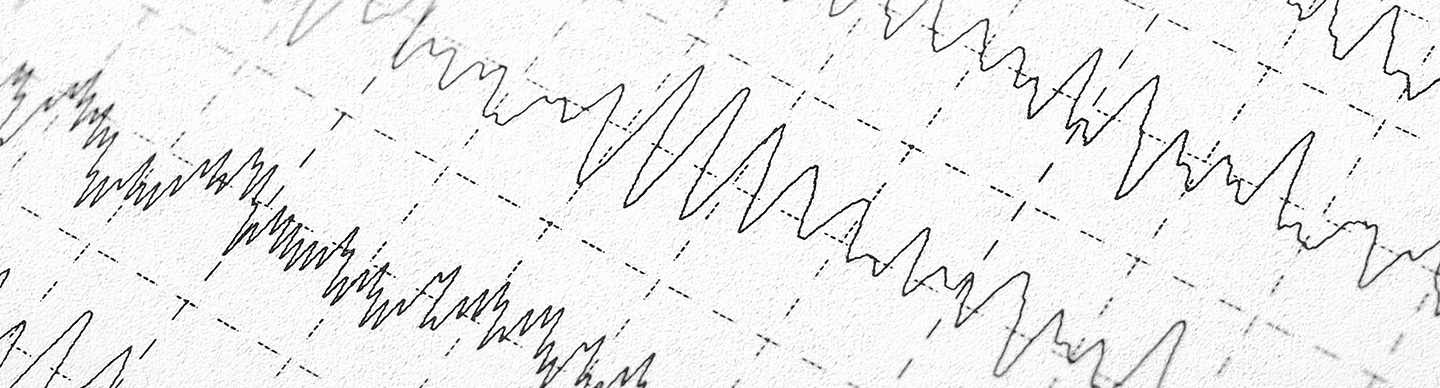

# Descrição

Um experimento foi realizado com as seguintes especificações:

## Protocolo

*  Bloco 1: 30 segundos olhos abertos, 30 segundos olhos fechados
*  Bloco 2: artefatos (piscada, mordida, etc) com duração de 5 segundos, com 5 segundos de pausa entre artefatos

## Passo-a-passo do experimento

1. Escolha de regiões para o estudo
2. Recrutamento de participante e medição do diâmetro da cabeça
3. Escolha da touca e montagem do template, usando eletrodos de acordo com o passo 1
4. Colocação da touca
5. Redução de impedância dos eletrodos
6. Realização do experimento segundo o protocolo estabelecido
7. Desmontagem da touca, lavagem e armazenamento

(Vídeo instrucional mais abaixo)


# Resultados

Imagem para consulta de posição dos eletrodos e áreas que eles cobrem:

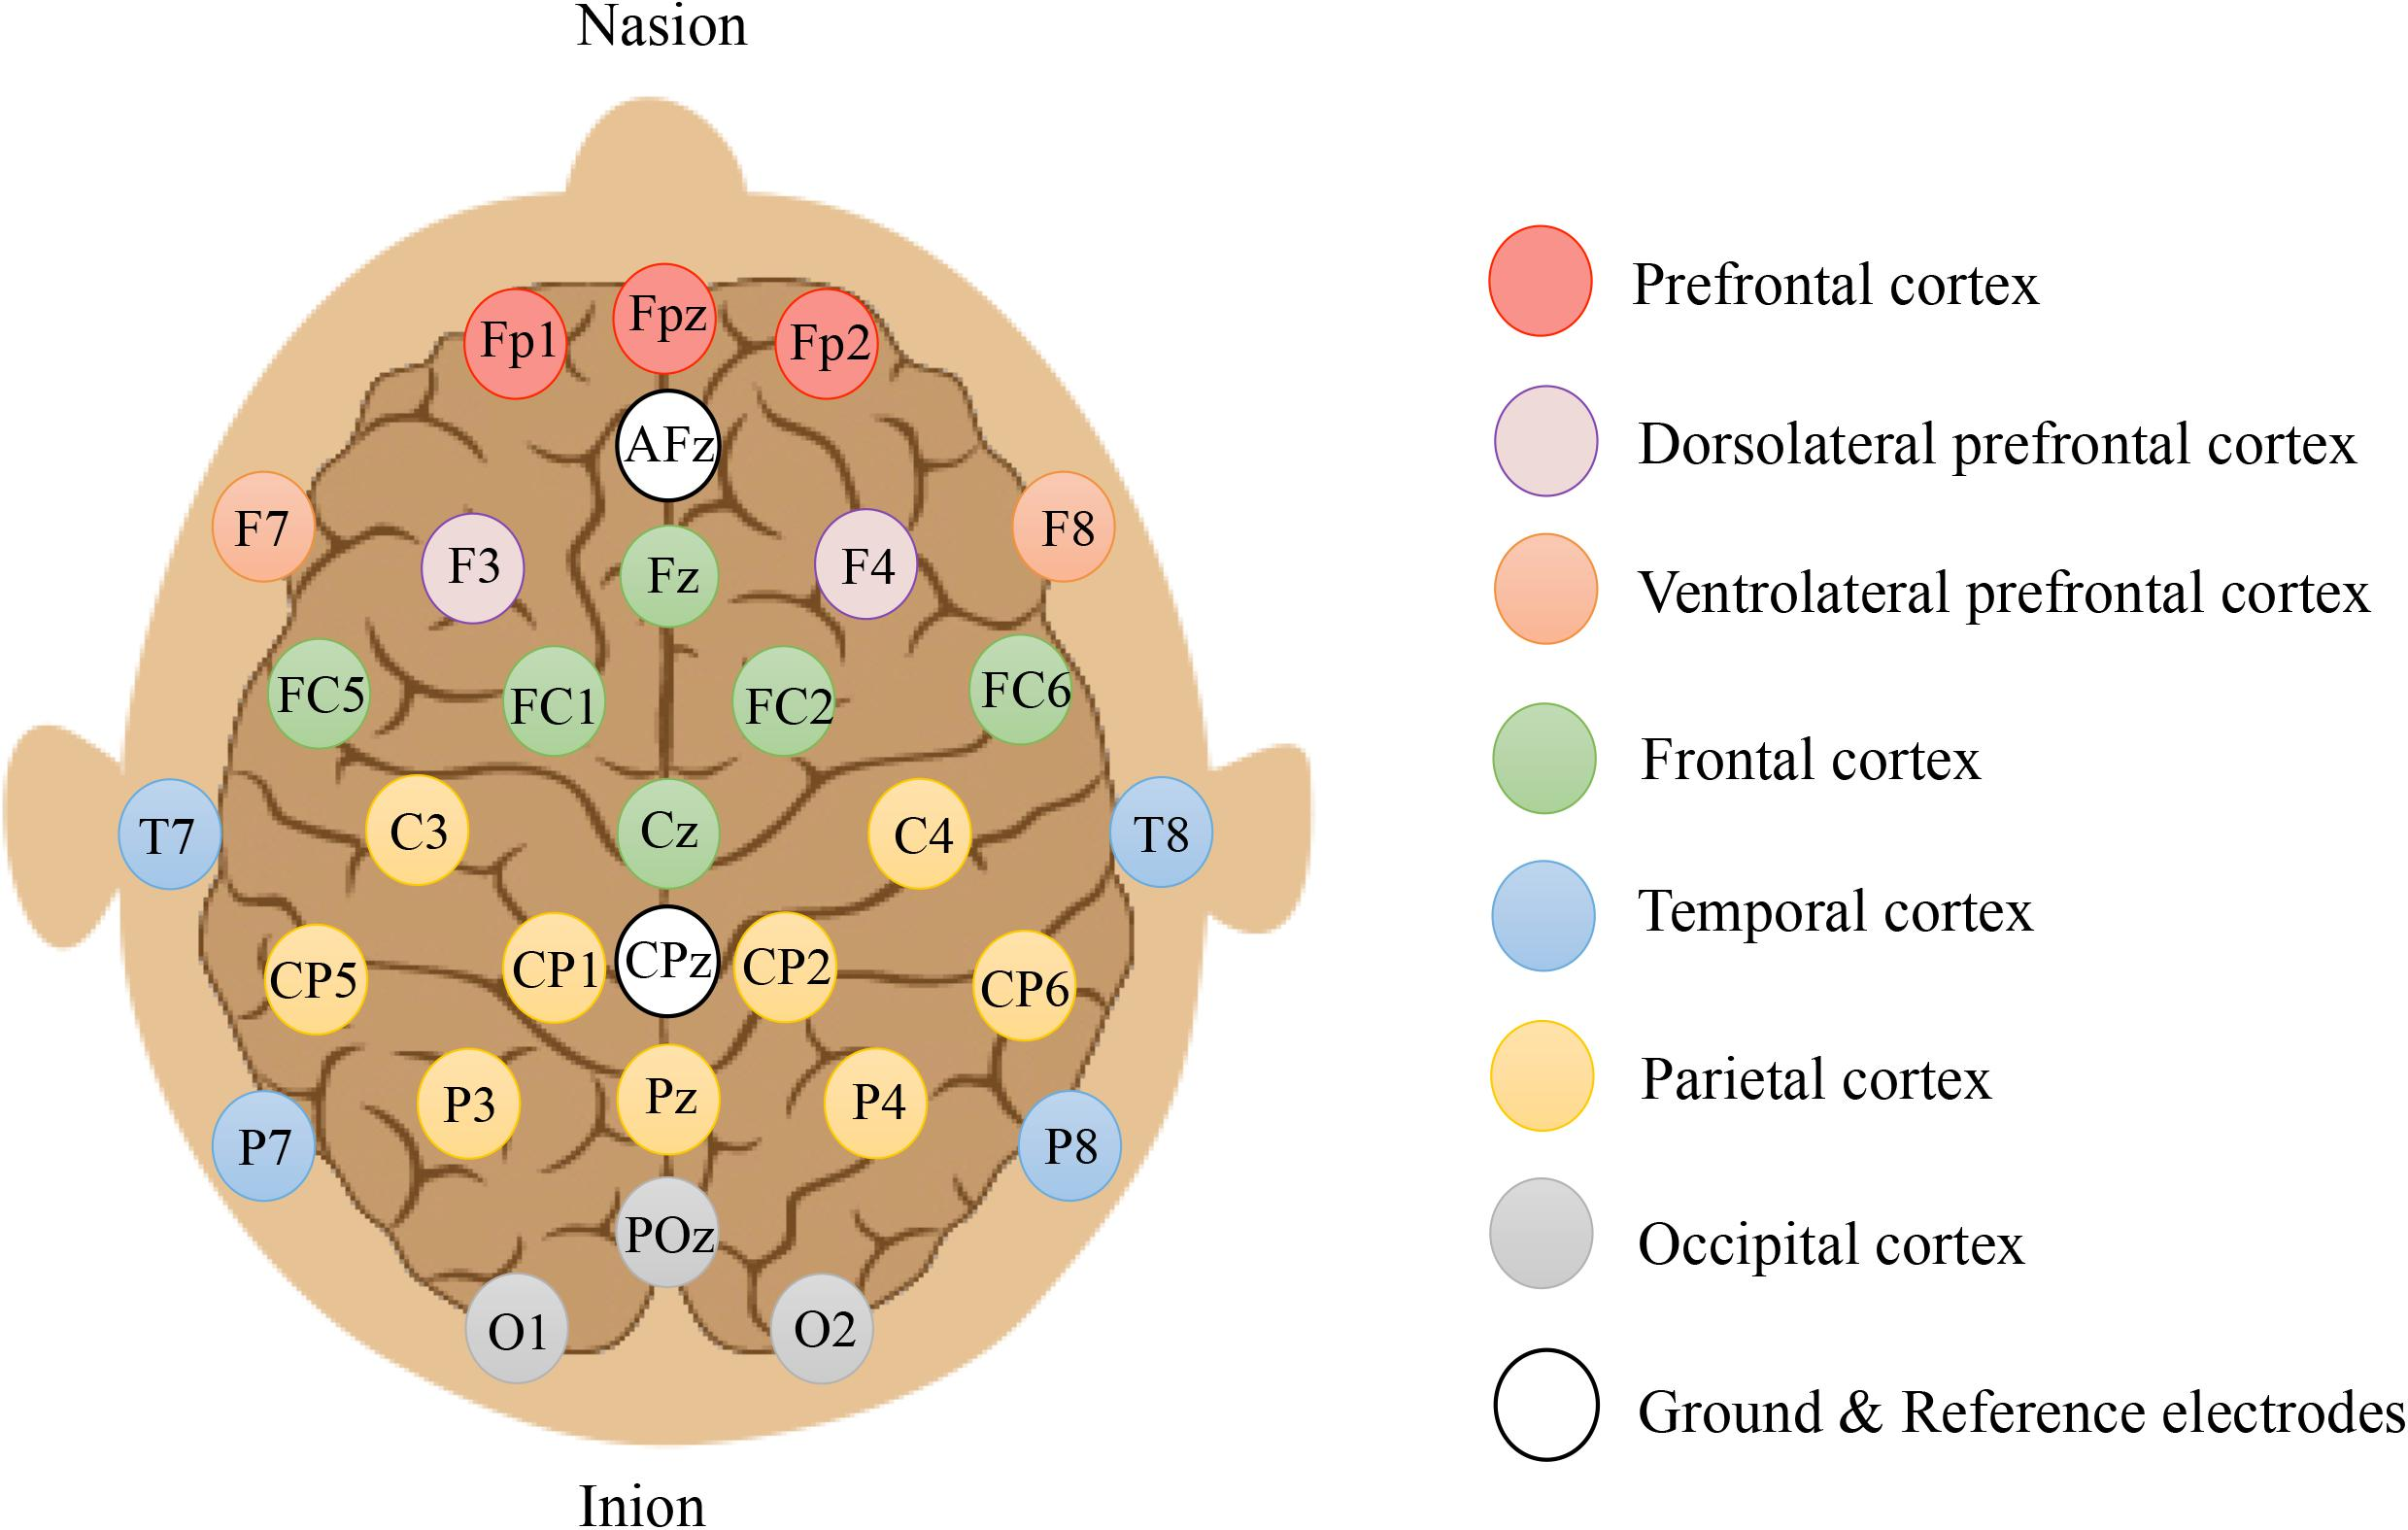

Escolhemos uma distribuição de 16 canais de registro nas regiões corticais pré-frontal, frontal, parietal e occipital, onde possivelmente encontraríamos os padrões de coleta (necessita de confirmação pela literatura). O eletrodo de referência foi posicionado na região frontal, em Fpz e o ground em Tp9 (atrás da orelha esquerda). Abaixo, as posições dos eletrodos são reproduzidas:

In [ ]:
!pip install mne
import numpy as np
import mne

from matplotlib import pyplot as plt
from scipy import signal

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


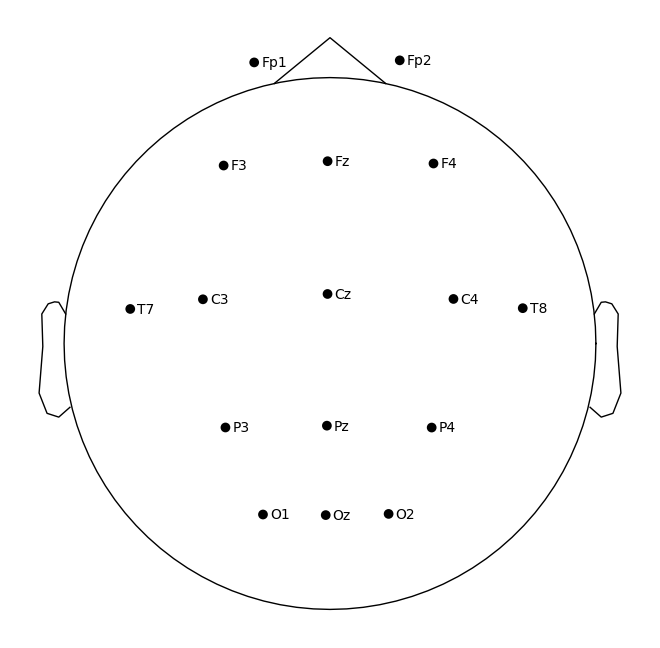

In [ ]:
sampling_freq = 512  # in Hertz
ch_names = ['Fp1','Fp2','F3','Fz','T7','C3','Cz','P3','O1','Oz','O2','Pz','P4','C4','F4','T8']
ch_types = ["eeg"] * 16
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
info.set_montage("standard_1020")

montage = info.get_montage()
montage.plot();

O diâmetro da cabeça do participante foi medida em ~58cm. Utilizando o kit de eletrodos 16 canais actiCap e touca easyCap (disponíveis no lab13), a montagem foi realizada. O vídeo abaixo é uma demonstração análoga de como relizar o preparo da touca.

Tempo médio de preparo: ~20 minutos

In [ ]:
# @title Vídeo: montagem de touca EEG
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      video = YouTubeVideo(id=video_ids[i][1], width=W,
                            height=H, fs=fs, rel=0)
      print(f'Video available at https://youtube.com/watch?v={video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'CiophiSq610')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

Para coleta dos dados, o amplificador digital V-Amp, com taxa de amostragem de 512Hz foi usado.

Um ambiente de coleta simples foi criado no software de aquisição OpenVibe, contendo apenas o cliente de recepção de dados, um visualizador em tempo-real e um gravador em arquivos .csv

Com isso, dois arquivos foram registrados. Vamos analisá-los abaixo:


# Análise

## Arquivo 1: Olhos abertos, olhos fechados

Foi pedido ao participante manter os olhos abertos e permanecer relaxado por 30 segundos, sem fixar o olhar em nada a sua frente. Quando dado o aviso de 30 segundos, o participante fechou os olhos e os manteve fechados por mais 30 segundos.

O que se espera verificar nesse caso? Um dos padrões mais conhecidos do EEG é a amplificação de ondas na frequência alfa (8-12Hz) quando os olhos da pessoa estão fechados.



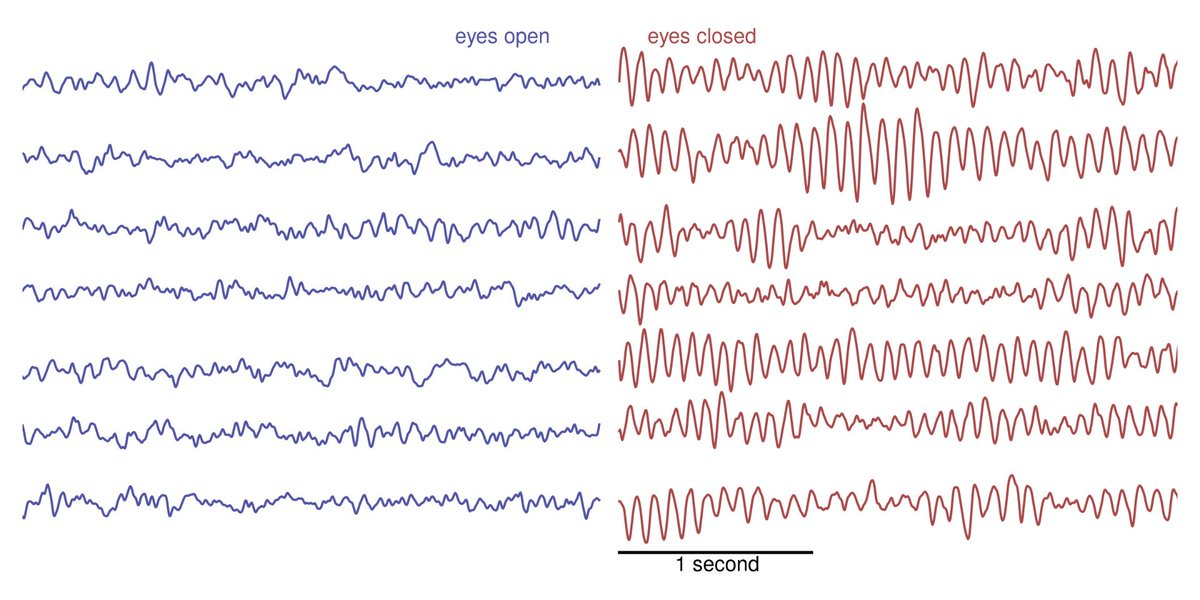

**[Exercício] Observando a figura acima, descreva em suas palavras as características observadas no sinal EEG para olhos abertos (open eyes) e olhos fechados (closed eyes)**

Confirme que a frequência alfa está presente no momento de olhos fechados (uma forma é contar quantos ciclos existem em um segundo do sinal).


### Prática 1: Abrindo o arquivo

Usando a biblioteca pandas, abra o arquivo do registro descrito acima. Abaixo, uma preparação do código para você iniciar.

Use a função read_csv do pandas para ler o arquivo

In [ ]:
import pandas as pd

pasta_dados = '/content/drive/Shareddrives/Grupo Ada/🧠 PROJETOS/🦾🧠 ICM com treino zero/Dados/Coleta/Coleta 09 08/'
arquivo     = 'open and close'

df_eyes = pd.read_csv(pasta_dados + arquivo)

**[Exercício] Verifique o dado carregado e faça uma descrição sucinta dele: o que são as colunas do DataFrame? Qual o tamanho do dado? (espera-se que tenha ~60 segundos de coleta) Quais são as colunas dos canais EEG?**


In [ ]:
df_eyes

,Time:512Hz,Epoch,FP1,FP2,F3,Fz,T7,C3,Cz,P3,...,Oz,O2,Pz,P4,C4,F4,T8,Event Id,Event Date,Event Duration
0,0.000000,0,27133.742188,19073.292969,23559.962891,10953.663086,-2536.377197,25672.707031,15310.254883,3130.957275,...,-898.730530,-6388.867676,10216.211914,202.099625,12865.381836,14929.444336,10565.430664,NaN,NaN,NaN
1,0.001953,0,27134.962891,19064.503906,23557.130859,10950.245117,-2538.720947,25672.853516,15310.938477,3128.662354,...,-896.093811,-6385.352051,10215.577148,204.541031,12861.622070,14928.418945,10570.801758,NaN,NaN,NaN
2,0.003906,0,27137.355469,19068.068359,23558.058594,10951.954102,-2545.508057,25674.220703,15308.155273,3131.592041,...,-898.828186,-6385.010254,10216.993164,199.902359,12861.573242,14924.268555,10553.711914,NaN,NaN,NaN
3,0.005859,0,27137.404297,19064.259766,23555.714844,10945.850586,-2545.508057,25674.904297,15309.327148,3129.297119,...,-900.439514,-6387.354004,10214.063477,203.417984,12860.108398,14923.340820,10534.327148,NaN,NaN,NaN
4,0.007812,0,27136.183594,19072.853516,23562.160156,10953.125977,-2543.701416,25672.902344,15308.985352,3129.443604,...,-898.242249,-6382.959473,10217.383789,204.394547,12865.381836,14922.754883,10551.319336,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31003,60.552734,968,27550.050781,19969.044922,24311.281250,11919.581055,-2656.836182,26302.589844,16192.334961,2966.601807,...,-900.000061,-6020.557129,11006.348633,692.871155,13460.596680,15737.745117,10962.696289,NaN,NaN,NaN
31004,60.554688,968,27554.347656,19969.240234,24312.355469,11918.848633,-2653.662354,26301.466797,16195.948242,2970.654541,...,-892.138733,-6025.000488,11007.471680,694.384827,13460.743164,15737.793945,10966.993164,NaN,NaN,NaN
31005,60.556641,968,27554.591797,19969.093750,24314.064453,11923.389648,-2647.461182,26300.880859,16195.899414,2973.877197,...,-892.236389,-6013.135254,11009.083008,701.611389,13463.916992,15742.188477,10971.485352,NaN,NaN,NaN
31006,60.558594,968,27552.638672,19969.484375,24316.261719,11922.999023,-2643.896729,26302.931641,16198.389648,2972.217041,...,-885.351624,-6009.766113,11010.547852,704.785217,13464.991211,15742.627930,10973.438477,NaN,NaN,NaN


### Prática 2: Ondas alfa

**[Exercício] Faça uma breve revisão sobre as ondas alfa presentes no EEG no momento em que uma pessoa fecha os olhos**

Algumas perguntas para te guiar (talvez não seja possível responder todas elas):
* O que produz as ondas alfa?
* Que regiões do córtex produzem ondas alfa?
* Em que canais do EEG as ondas alfa são mais proeminentes?
* O que as ondas alfa significam?

**[Exerício] Com base na sua revisão, escolha canais do dataframe e anote**

Vamos tentar observar as ondas alfa por meio de 3 análises, que são análogas

Antes de prosseguirmos, vamos realizar um pré-processamento no sinal:

* A posição do eletrodo de referência interfere na leitura dos canais, já que cada canal é a diferença de potencial elétrico de sua posição em relação ao eletrodo de referência. Nesse caso, é comum o uso de um filtro espacial chamado Common Average Reference, de forma que a nova referência seja a média de todos os canais e não o canal de referência usado no experimento (FPz)



In [ ]:
df_eyes['Media'] = np.mean(df_eyes.iloc[:,2:18], axis = 1)
for canal in ['FP1', 'FP2', 'F3', 'Fz', 'T7', 'C3', 'Cz', 'P3', 'O1', 'Oz', 'O2', 'Pz', 'P4', 'C4', 'F4', 'T8']:
  df_eyes[canal] = df_eyes[canal] - df_eyes['Media']

Um segundo pré-processamento pode ser realizado: a filtragem de frequências, reduzindo as componentes presentes no sinal ou, dizendo de outra forma, selecionando apenas a faixa de frequências de interesse.

Abaixo temos um código exemplo de como você pode aplicar um filtro passa-bandas no seu sinal

In [ ]:
# Definindo a função de filtragem
def filtra_sinal(sinal, freq_low, freq_high, taxa_amostragem):
  b, a = signal.butter(3, [freq_low, freq_high], 'bandpass', fs = taxa_amostragem)
  filt_sinal = signal.filtfilt(b,a, sinal)
  return filt_sinal

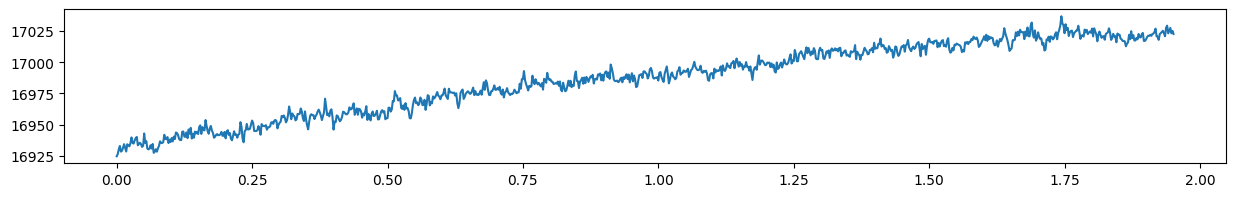

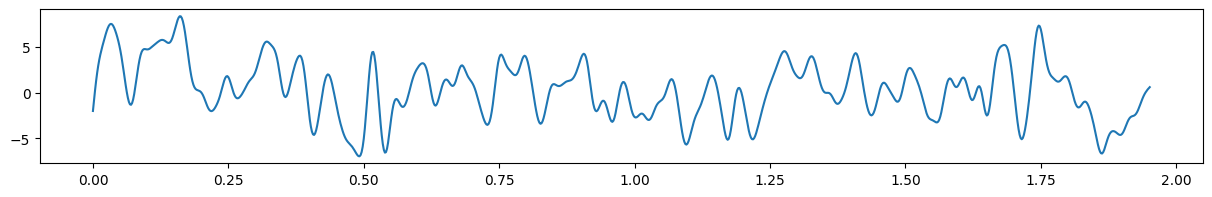

In [ ]:
# 1. Escolhendo um canal e passando para numpy array
canal_escolhido = df_eyes['FP1']

# 2. Passando para numpy array
canal_escolhido = np.array(canal_escolhido)

# 3. filtrando sinal em uma faixa escolhida (1Hz - 30Hz)
filt_canal_escolhido = filtra_sinal(canal_escolhido, freq_low = 1, freq_high = 30, taxa_amostragem = 512)

# 4. Visualizando
plt.figure(figsize = (15, 2))
plt.plot(df_eyes['Time:512Hz'].iloc[:1000], canal_escolhido[0:1000])
plt.show()

plt.figure(figsize = (15, 2))
plt.plot(df_eyes['Time:512Hz'].iloc[:1000], filt_canal_escolhido[0:1000])
# plt.ylim(0, 200)
plt.show()

plt.show()

#### 1. Análise no tempo

**[Exercício] Escreva o seguinte código:**

* Extraia a coluna do dataframe contendo seu canal de interesse
* Plote 5 segundos do momento em que o participante estava de olhos abertos
* Plote 5 segundos do momento em que o participantes estava de olhos fechados

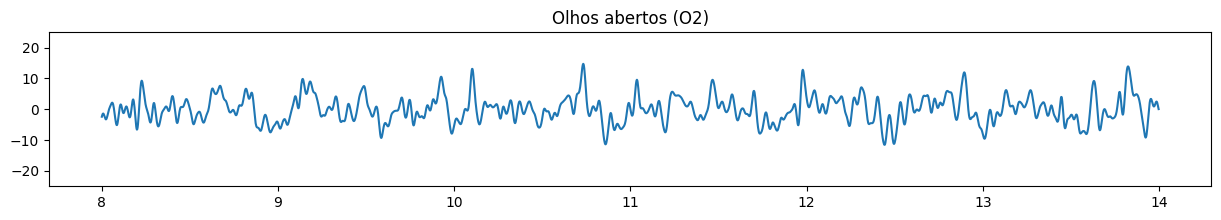

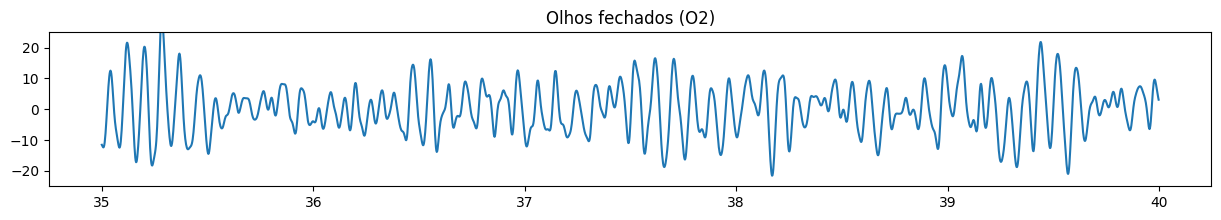

In [ ]:
# @title Clique para ver uma possível solução

# Escolhendo canal
canal = 'O2'

# Extraindo array do dataframe
canal_escolhido = np.array(df_eyes[canal])

# Filtrando
filt_canal_escolhido = filtra_sinal(canal_escolhido, freq_low = 1, freq_high = 30, taxa_amostragem = 512)

# Plotando
plt.figure(figsize = (15, 2))
plt.plot(df_eyes['Time:512Hz'].iloc[8*512:14*512], filt_canal_escolhido[8*512:14*512]) # 8 a 14 segundos (olhos abertos)
plt.title('Olhos abertos (' + canal + ')')
plt.ylim(-25, 25)
plt.plot()

plt.figure(figsize = (15, 2))
plt.plot(df_eyes['Time:512Hz'].iloc[35*512:40*512], filt_canal_escolhido[35*512:40*512]) # 35 a 40 segundos (olhos fechados)
plt.title('Olhos fechados (' + canal + ')')
plt.ylim(-25, 25)
plt.show()


#### 2. Análise no domínio das frequências

**[Exercício] Escreva o seguinte código:**
* Escolha um canal do EEG
* Isole os momentos em que o participantes estava de olhos abertos e de olhos fechados
* Para cada momento, aplique a transformada de fourier ou análoga
* Plote e compare

Nota: vimos a transformada de fourier na [aula 2](https://colab.research.google.com/drive/1LCN0dmXlCNfkDxAI2DKp09efott42hnB?usp=sharing), se ainda não é uma ideia intuitiva para você, dê uma olhada nas referências sugeridas.

Dica: a transformada de Fourier pode ser aplicada no sinal com a biblioteca [scipy.fft](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fdocs.scipy.org%2Fdoc%2Fscipy%2Ftutorial%2Ffft.html)

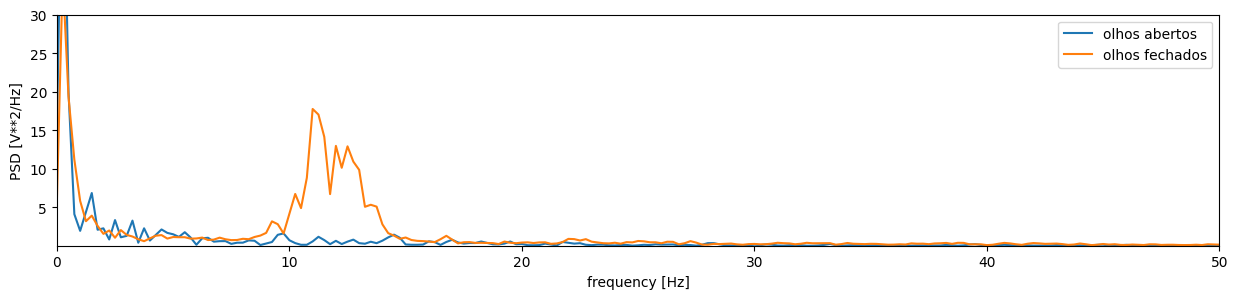

In [ ]:
# @title Clique para ver uma possível solução

from scipy.fft import fft, fftfreq
from scipy import signal

# Esoclhendo o canal
canal = 'O2'

# Selecionando momento de olhos abertos (antes dos 30s) e filtrando
olhos_abertos  = np.array(df_eyes[canal].iloc[8*512:14*512])
filt_olhos_abertos = filtra_sinal(olhos_abertos, freq_low = 1, freq_high = 30, taxa_amostragem = 512)

# Selecionando momento de olhos fechados (depois dos 30s) e filtrando
olhos_fechados = np.array(df_eyes[canal].iloc[35*512:55*512])
filt_olhos_fechados = filtra_sinal(olhos_fechados, freq_low = 1, freq_high = 30, taxa_amostragem = 512)


f, Pxx_open = signal.welch(olhos_abertos, 512, nperseg=4*512)
f, Pxx_closed = signal.welch(olhos_fechados, 512, nperseg=4*512)

plt.figure(figsize = (15, 3))
plt.plot(f, Pxx_open, label = 'olhos abertos')
plt.plot(f, Pxx_closed, label = 'olhos fechados')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim(0, 50)
plt.legend()
plt.ylim(0.01,30)
plt.show()

#### 3. Análise com espectrograma

**[Exercício] Escreva o seguinte código:**

* Escolha um canal do EEG
* Estime um tamanho de janela e overlap para realizar o espectrograma
* Aplique o espectrograma
* Plote e interprete

Para ganhar uma intuição sobre o espectrograma, visite o site do [musiclab](https://musiclab.chromeexperiments.com/spectrogram/)

No python, a função [scipy.signal.spectrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html) pode ser usada

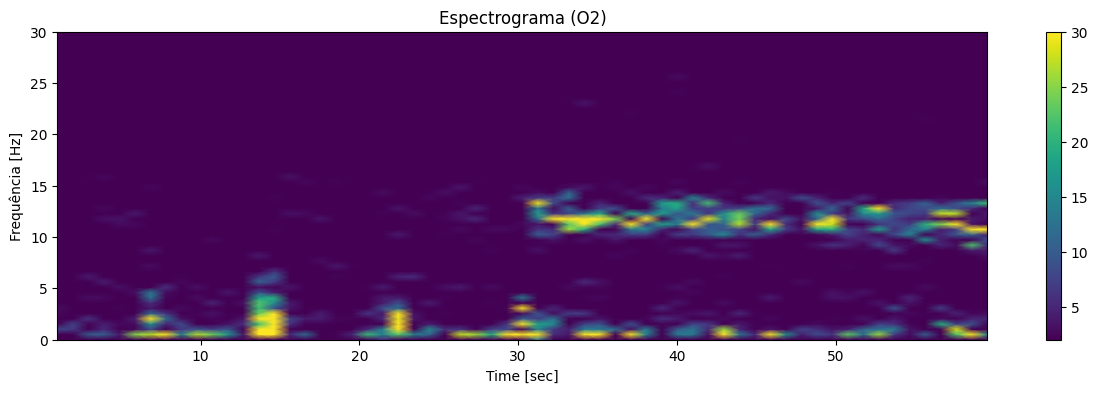

In [ ]:
# @title Clique para ver uma possível solução

from scipy import signal

# Escolhendo canal
canal = 'O2'
canal_escolhido = np.array(df_eyes[canal])

# O sinal não é filtrado, não precisa

# nperseg: tamanho da janela (~1 segundo)
nperseg = 1000

# noverlap: intersecção entre janelas consecutivas (50%)
noverlap = 0.5*nperseg

# Extraindo espectrograma
f, t, Sxx = signal.spectrogram(canal_escolhido, 512, nperseg = nperseg, noverlap = noverlap)

# Visualizando
plt.figure(figsize = (15, 4))
plt.pcolormesh(t, f, Sxx, shading='gouraud', vmin = 2, vmax = 30)
plt.colorbar()
plt.ylabel('Frequência [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 30)
plt.title('Espectrograma (' + canal + ')')
plt.show()

## Arquivo 2: artefatos

Teste o seu conhecimento e explore o arquivo do segundo bloco

In [ ]:
arquivo     = 'artefatos'


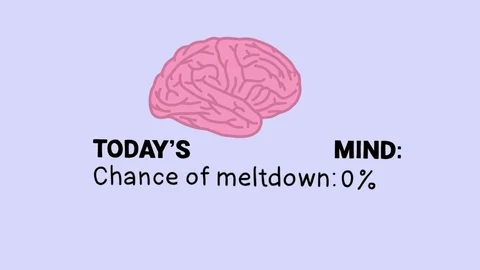